In [1]:
import cv2
import numpy as np
import imutils
import pytesseract
import matplotlib.pyplot as plt

In [20]:
def process_image(path_img: str):
    img = cv2.imread(path_img)
    (H, W) = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(blur, 30, 200)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

    screenCnt = None
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)
        if len(approx) == 4:
            screenCnt = approx
            break
    
    if screenCnt is None:
        detected = False
        print ("No contour detected")
        return None, detected, None, None, None, None
    else:
        detected = True
        mask = np.zeros(gray.shape,np.uint8)
    
        new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
        new_image = cv2.bitwise_and(img,img,mask=mask)

        (x, y) = np.where(mask == 255)
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))
        Cropped = gray[topx:bottomx+1, topy:bottomy+1]

        return Cropped, detected, topx, topy, bottomx, bottomy


In [16]:
def show_image(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='gray')
    plt.show()
    

In [17]:
# create function to get text from image
def get_text(img):
    alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    config = F"-c tessedit_char_whitelist={alphanumeric} --tessdata-dir tessdata --psm 8"
    text = pytesseract.image_to_string(img, lang="eng", config=config)
    text = "".join([c for c in text if c.isalnum()])
    return text

In [18]:
! export TESSDATA_PREFIX="/home/matheus/Documents/UnB/PI2/IA"

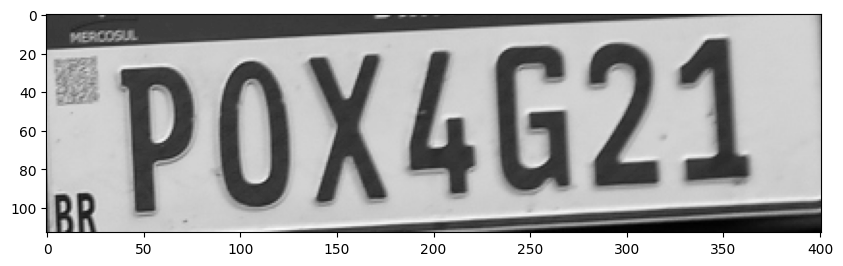

POX4G24


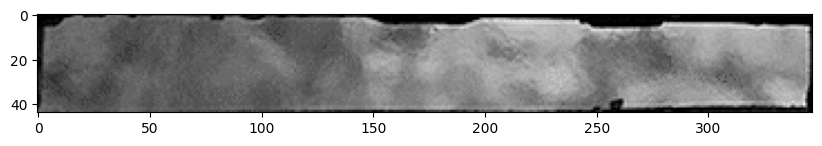

ER


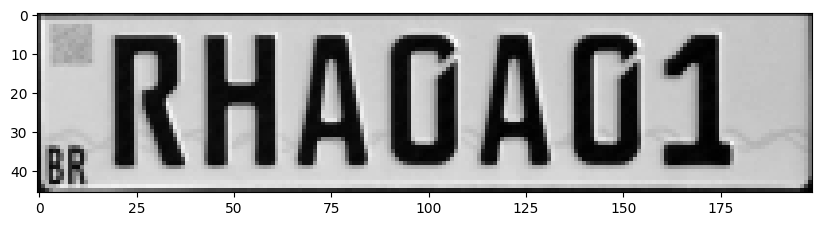

RHAGAG1


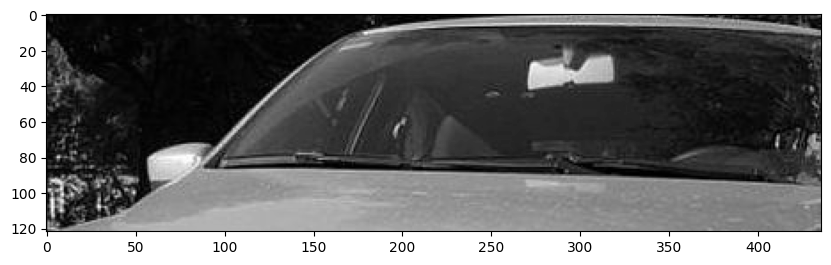

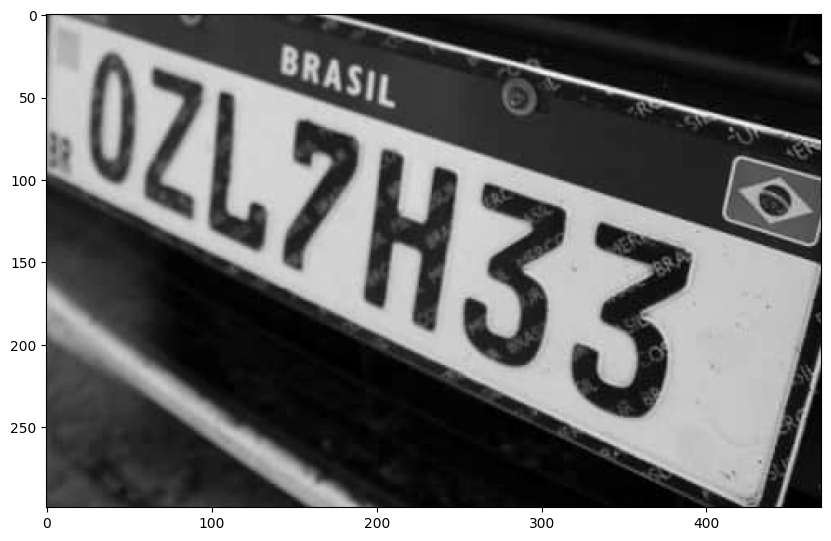

HSS


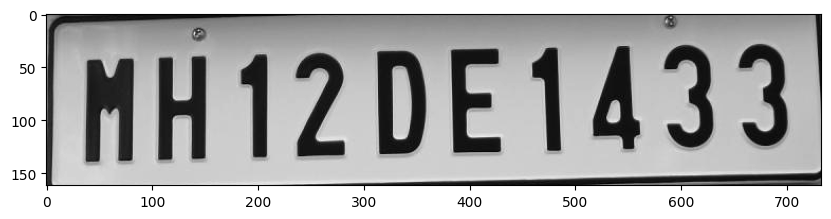

MH12DE1433
No contour detected
No contour detected


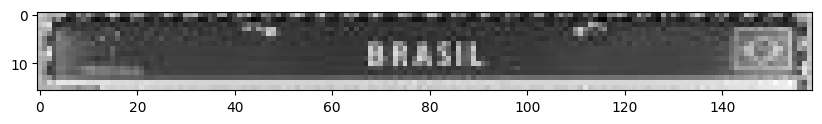

SS


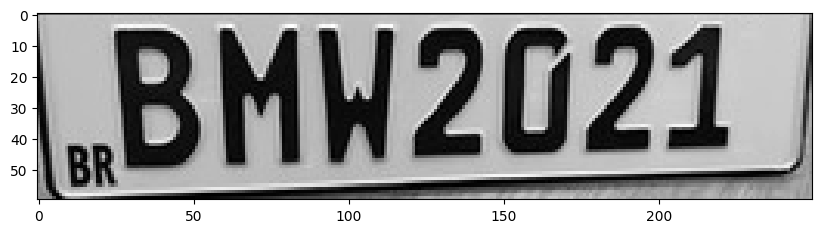

BMW2021


In [23]:
for i in range(1, 11):
    img, detected, topx, topy, bottomx, bottomy = process_image(f'images/carro{i}.jpg')
    if detected:
        show_image(img)
        print(get_text(img))